In [1]:
import h5py
import os
from os.path import isfile
import numpy as np    
import scipy.io
import cbf
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
import pandas as pd
import pyFAI, fabio
from PIL import Image
from scipy.ndimage.filters import median_filter
from scipy import ndimage
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks

from datetime import date

from scipy import optimize
from scipy.optimize import curve_fit

%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
def load_cbf(filename):
    if isfile(filename):
        f = fabio.open(filename) # Open image file
        return np.array(f.data)
    else:
        print('file' , filename, ' does not exist!')
        return 0

In [3]:
# ls ../../../raw/G4p1_1_180_00008/p300

In [74]:
ls ../03-masks/

G2p1_NP_2_180_00005_00.npy     HydLys_0p25_2_00015_00.npy
HydLys_0p25_2_00001_00_g.npy   HydLys_0p29_2_00001_00.npy
HydLys_0p25_2_00001_00.npy     HydLys_0p29_2_00002_00.npy
HydLys_0p25_2_00002_00_g.npy   HydLys_0p29_2_00003_00.npy
HydLys_0p25_2_00002_00.npy     HydLys_0p29_2_00004_00.npy
HydLys_0p25_2_00003_00_g.npy   HydLys_0p29_2_00005_00.npy
HydLys_0p25_2_00003_00.npy     HydLys_0p29_2_00006_00.npy
HydLys_0p25_2_00004_00_g.npy   HydLys_0p29_2_00007_00.npy
HydLys_0p25_2_00004_00.npy     HydLys_0p29_2_00008_00.npy
HydLys_0p25_2_00005_00_02.npy  HydLys_0p29_2_00009_00.npy
HydLys_0p25_2_00005_00_03.npy  HydLys_0p29_2_00010_00.npy
HydLys_0p25_2_00005_00_g.npy   HydLys_0p29_2_00011_00.npy
HydLys_0p25_2_00005_00.npy     HydLys_0p29_2_00012_00.npy
HydLys_0p25_2_00005_g.npy      HydLys_0p29_2_00013_00.npy
HydLys_0p25_2_00006_00_g.npy   HydLys_0p29_2_00014_00.npy
HydLys_0p25_2_00006_00.npy     HydLys_0p29_2_00015_00.npy
HydLys_0p25_2_00006_g.npy      HydLys_0p29_3_00004_00.npy
HydLys_0p25_2_

In [80]:
!ls ../../../raw/empty_capillary_296_00001/p300

empty_capillary_296_00001_00001.cbf  empty_capillary_296_00001_05001.cbf
empty_capillary_296_00001_00001.log  empty_capillary_296_00001_05002.cbf
empty_capillary_296_00001_00002.cbf  empty_capillary_296_00001_05003.cbf
empty_capillary_296_00001_00003.cbf  empty_capillary_296_00001_05004.cbf
empty_capillary_296_00001_00004.cbf  empty_capillary_296_00001_05005.cbf
empty_capillary_296_00001_00005.cbf  empty_capillary_296_00001_05006.cbf
empty_capillary_296_00001_00006.cbf  empty_capillary_296_00001_05007.cbf
empty_capillary_296_00001_00007.cbf  empty_capillary_296_00001_05008.cbf
empty_capillary_296_00001_00008.cbf  empty_capillary_296_00001_05009.cbf
empty_capillary_296_00001_00009.cbf  empty_capillary_296_00001_05010.cbf
empty_capillary_296_00001_00010.cbf  empty_capillary_296_00001_05011.cbf
empty_capillary_296_00001_00011.cbf  empty_capillary_296_00001_05012.cbf
empty_capillary_296_00001_00012.cbf  empty_capillary_296_00001_05013.cbf
empty_capillary_296_00001_00013.cbf  empty_capillar

In [87]:
datdir = '/home/maddabin/p10-llt/raw'

In [93]:
sample = 'empty_capillary_296_00001'

<IPython.core.display.Javascript object>


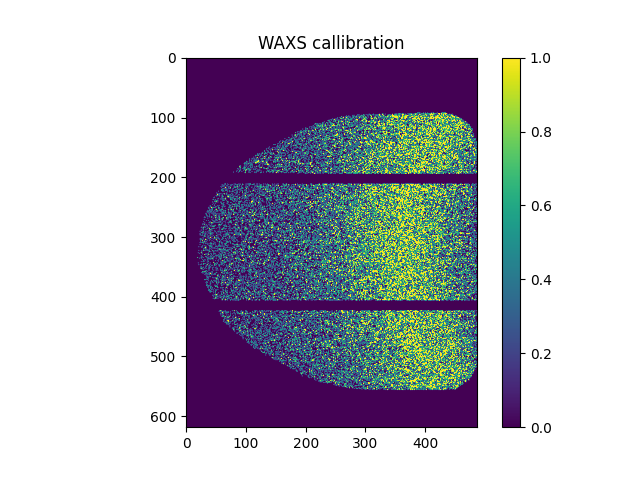

In [95]:
img = load_cbf(f'{datdir}/{sample}/p300/{sample}_00010.cbf')
mask = '../03-masks/p300_mask_221130.npy'
v_mask = np.load(mask)
mask = img == 0
img_norm = img*v_mask

fig = plt.figure()
plt.imshow(img_norm, vmin=0, vmax=1)
plt.colorbar()
plt.title(f'WAXS callibration')
plt.show()

In [7]:
#mask = np.where((mask==0)|(mask==1), mask^1, mask)
#mask = np.load('../../calibrators/pilatus_mask_setup2_02.npy')  
#mask = np.where((mask==0)|(mask==1), mask^1, mask)

In [28]:
!ls ../../../processed/maddalena/03-masks

G2p1_NP_2_180_00005_00.npy     HydLys_0p25_2_00015_00_g.npy
HydLys_0p25_2_00001_00_g.npy   HydLys_0p25_2_00015_00.npy
HydLys_0p25_2_00001_00.npy     HydLys_0p29_2_00001_00.npy
HydLys_0p25_2_00002_00_g.npy   HydLys_0p29_2_00002_00.npy
HydLys_0p25_2_00002_00.npy     HydLys_0p29_2_00003_00.npy
HydLys_0p25_2_00003_00_g.npy   HydLys_0p29_2_00004_00.npy
HydLys_0p25_2_00003_00.npy     HydLys_0p29_2_00005_00.npy
HydLys_0p25_2_00004_00_g.npy   HydLys_0p29_2_00006_00.npy
HydLys_0p25_2_00004_00.npy     HydLys_0p29_2_00007_00.npy
HydLys_0p25_2_00005_00_02.npy  HydLys_0p29_2_00008_00.npy
HydLys_0p25_2_00005_00_03.npy  HydLys_0p29_2_00009_00.npy
HydLys_0p25_2_00005_00_g.npy   HydLys_0p29_2_00010_00.npy
HydLys_0p25_2_00005_00.npy     HydLys_0p29_2_00011_00.npy
HydLys_0p25_2_00005_g.npy      HydLys_0p29_2_00012_00.npy
HydLys_0p25_2_00006_00_g.npy   HydLys_0p29_2_00013_00.npy
HydLys_0p25_2_00006_00.npy     HydLys_0p29_2_00014_00.npy
HydLys_0p25_2_00006_g.npy      HydLys_0p29_2_00015_00.npy
HydLys_0p25_

In [96]:
class high_E_XRD(object):
    def __init__(self):
        self.name = ''
        self.array = None
        self.integrator = ''
        self.path = ''
        self.label = ''
        self.scan = ''
        self.detector = ''
        self.background = ''
        self.absorber = ''

    def import_image(self, name):
        self.label = self.path.split('/')[-3]
        if self.scan == 'damage':
            self.image_tif = np.array(tf.imread(f'{self.path}/{self.absorber}/{self.detector}/{self.name}.tif'))
        if self.scan == 'Tramp':
            self.image_tif = np.array(tf.imread(f'{self.path}/{self.detector}/{self.name}.tif'))

        
    def import_cbf_image(self, name):
        self.label = self.path.split('/')[-3]
        if self.scan == 'damage':
            self.image_cbf = load_cbf(f'{self.path}/{self.absorber}/{self.detector}/{self.name}.cbf')
        if self.scan == 'Tramp':
            self.image_cbf = load_cbf(f'{self.path}/{self.detector}/{self.name}.cbf')
        if self.scan == '':
            self.image_cbf = load_cbf(f'{self.path}/{self.detector}/{self.name}.cbf')
        
    def plot_tif_image(self, name):
        fig=plt.figure()
        ax=fig.add_subplot(111)
        self.import_image(self.name)
        ax.imshow(self.image, vmin=4, vmax=200)
        ax.set_title(f'{self.name}')
        
    def plot_cbf_image(self, name):
        fig=plt.figure()
        ax=fig.add_subplot(111)
        self.import_cbf_image(self.name)
        if self.detector =='SAXS':
            ax.imshow(self.image_cbf*mask,vmin=4, vmax=50)
            ax.set_title(f'{self.name}')
        else:
            ax.imshow(self.image_cbf,vmin=4, vmax=1500)
            ax.set_title(f'{self.name}')
        
    def integrate(self, integrator):
        self.label = self.path.split('/')[-2]
           
        self.import_cbf_image(self.name)
        if os.path.exists(f'../07-analysis-waxs/{self.label}_{self.detector}'):
            pass
        
        else:
            os.mkdir(f'../07-analysis-waxs/{self.label}_{self.detector}') 
        
        ai = pyFAI.load(self.integrator)
        #print('check')
        if self.detector =='SAXS':
            
            res = ai.integrate1d(self.image_cbf,300,
                         unit='q_nm^-1', mask=~mask,#filename = f'../analysis/{self.name}.dat')
                         filename=f'../07-analysis-waxs/{self.label}_{self.detector}/{self.name}.dat')
        else:
            img = self.image_cbf
            img[(img < 0) | (img > 1000)] = 0
            
            mask = img == 0
            res = ai.integrate1d(img,1000, #mask = mask,
                         unit='q_nm^-1', #filename = f'../analysis/{self.name}.dat')
                         filename=f'../07-analysis-waxs/{self.label}_{self.detector}/{self.name}.dat')
        print(f'file saved in ../07-analysis-waxs/{self.label}_{self.detector} as {self.name.split()[-1]}.dat')
        
    def integrate2(self, integrator, binning):
        self.label = self.path.split('/')[-3]
           
        self.import_cbf_image(self.name)
        if os.path.exists(f'../07-analysis-waxs/{self.label}_{self.detector}_{binning}'):
            pass
        
        else:
            os.mkdir(f'../07-analysis-waxs/{self.label}_{self.detector}_{binning}') 
        
        ai = pyFAI.load(self.integrator)
        if self.detector =='SAXS':
            res = ai.integrate1d(self.image_cbf,binning,
                         unit='q_nm^-1', mask=~mask,#filename = f'../analysis/{self.name}.dat')
                         filename=f'../07-analysis-waxs/{self.label}_{self.detector}_{binning}/{self.name}.dat')
        else:
            img = self.image_cbf
            img[(img < 0) | (img > 1000)] = 0
            
            v_mask = img == 0
            res = ai.integrate1d(img,binning, mask = v_mask,
                         unit='q_nm^-1', #filename = f'../analysis/{self.name}.dat')
                         filename=f'../07-analysis-waxs/{self.label}_{self.detector}_{binning}/{self.name}.dat')
        print(f'file saved in ../07-analysis-waxs/{self.label}_{self.detector}_{binning} as {self.name.split()[-1]}.dat')
        
    def plot_Iq(self,count):
        
        self.label = self.path.split('/')[-3]
        
        if self.scan == 'Tramp':
            self.Temp = self.GetTemp()+273
        
        if self.absorber =='None':
            Transm = 1
            
        elif self.absorber =='air':
            Transm = 1
        
        elif self.absorber =='Al1':  
            Transm = 0.5
            
        elif self.absorber =='Al2':  
            Transm = 0.25
        
        elif self.absorber =='Al3':  
            Transm = 0.125
            
        elif self.absorber =='Al4':  
            Transm = 1
        
        elif self.absorber =='Al6':  
            Transm = 0.0156/0.0624
        else:
            print('absorber not defined')
            
        bckr=self.background
        self.x,self.y=[],[]
        
        
        with open(f"../07-analysis-waxs/{self.label}_{self.detector}/{self.name}.dat") as f2:
            
            for line in f2:
                if line.strip()[0] == '#':
                    pass
                else:
                    self.xi, self.yi = line.split()
                    self.x.append(float(self.xi))
                    self.y.append(float(self.yi))
    
        if self.scan == 'Tramp':
            if bckr == '':
                    
                plt.plot(self.x, self.y, label=f'T{np.round(self.Temp[count],0)}K', color=col[count])
            
            else:
                bckr = Transm*np.asarray(self.load_bckr()[1])          
                plt.plot(self.x, np.asarray(self.y)-bckr, label=f'T{np.round(self.Temp[count],0)}K', color=col[count])
        
        else: 
            if bckr == '':
                        
                plt.plot(self.x, self.y, label=f'{self.name}', color=col[count])
                
            else:
                bckr = Transm*np.asarray(self.load_bckr()[1])          
                plt.plot(self.x, np.asarray(self.y)-bckr, label=f'{self.name}', color=col[count])
            
        plt.xlabel('q [1/nm]')
        plt.ylabel('I(q)')
        plt.legend()
        plt.yscale('log')
        
        
    def plot_raw_Iq(self,count,binning=None):
        
        self.label = self.path.split('/')[-3]
        self.x,self.y=[],[]
        
        if self.scan == 'Tramp':
            self.Temp = self.GetTemp()+273
        
        if binning == None:
            with open(f"../07-analysis-waxs/{self.label}_{self.detector}/{self.name}.dat") as f2:
            
                for line in f2:
                    if line.strip()[0] == '#':
                        pass
                    else:
                        self.xi, self.yi = line.split()
                        self.x.append(float(self.xi))
                        self.y.append(float(self.yi))
       
    
            if self.scan == 'Tramp':
                plt.plot(self.x, self.y, label=f'T{np.round(self.Temp[count],0)}K', color=col[count])

            else: 
                plt.plot(self.x, self.y, label=f'{self.name}', color=col[count])
                
        else:
            with open(f"../07-analysis-waxs/{self.label}_{self.detector}_{binning}/{self.name}.dat") as f2:
            
                for line in f2:
                    if line.strip()[0] == '#':
                        pass
                    else:
                        self.xi, self.yi = line.split()
                        self.x.append(float(self.xi))
                        self.y.append(float(self.yi))
       
    
            if self.scan == 'Tramp':
                plt.plot(self.x, self.y, label=f'T{np.round(self.Temp[count],0)}K', color=col[count])

            else: 
                plt.plot(self.x, self.y, label=f'{self.name}', color=col[count])
                
        plt.xlabel('q [1/nm]')
        plt.ylabel('I(q)')
        
        
    def load_Iq(self):
        self.label = self.path.split('/')[-3]
        
        if self.absorber =='None':
            Transm = 1
            
        elif self.absorber =='air':
            Transm = 1
        
        elif self.absorber =='Al1':  
            Transm = 0.5
            
        elif self.absorber =='Al2':  
            Transm = 0.25
        
        elif self.absorber =='Al3':  
            Transm = 0.125
            
        elif self.absorber =='Al4':  
            Transm = 0.0624
        
        elif self.absorber =='Al6':  
            Transm = 0.0156/0.0624
        else:
            print('absorber not defined')
        
        bckr=self.background
        self.x,self.y=[],[]
        
        self.label = self.path.split('/')[-3]
        with open(f"../07-analysis-waxs/{self.label}_{self.detector}/{self.name}.dat") as f2:
            for line in f2:
                if line.strip()[0] == '#':
                    pass
                else:
                    self.xi, self.yi = line.split()
                    
                    self.x.append(float(self.xi))
                    self.y.append(float(self.yi))
                    
                    
       # else:
       #     bckr = Transm*np.asarray(self.load_bckr()[1]) 
       #     self.x.append((float(self.xi)))
       #     self.y.append(float(self.yi))
                        
                        ###np.asarray(self.y)-bckr###
        if bckr == '':     
            return np.asarray(self.x), np.asarray(self.y)
        else:
            bckr = Transm*np.asarray(self.load_bckr()[1])
            return np.asarray(self.x), np.asarray(self.y)-bckr
        
        
    def load_raw_Iq(self, binning=None):
        self.label = self.path.split('/')[-3]
        self.x,self.y=[],[]
        
        if binning == None:
            with open(f"../07-analysis-waxs/{self.name}_{sample:05}.dat") as f2:
                for line in f2:
                    if line.strip()[0] == '#':
                        pass
                    else:
                        self.xi, self.yi = line.split()
                        
                        self.x.append(float(self.xi))
                        self.y.append(float(self.yi))
                       
            #print(f"loaded ../analysis/{self.label}_{self.detector}/{self.name}.dat")
            
        if self.detector == '':
            with open(f"../07-analysis-waxs/{self.name}_{sample:05}.dat") as f2:
                for line in f2:
                    if line.strip()[0] == '#':
                        pass
                    else:
                        self.xi, self.yi = line.split()
                        
                        self.x.append(float(self.xi))
                        self.y.append(float(self.yi))
                        
        else:
            with open(f"../07-analysis-waxs/{self.name}_{sample:05}.dat") as f2:
                for line in f2:
                    if line.strip()[0] == '#':
                        pass
                    else:
                        self.xi, self.yi = line.split()
                        
                        self.x.append(float(self.xi))
                        self.y.append(float(self.yi))
                        
        
                       
            #print(f"loaded ../analysis/{self.label}_{self.detector}_{binning}/{self.name}.dat")
                    
        #print(f"../analysis/{self.label}_{self.detector}/{self.name}.dat")
                    
       # else:
       #     bckr = Transm*np.asarray(self.load_bckr()[1]) 
       #     self.x.append((float(self.xi)))
       #     self.y.append(float(self.yi))
                        
                        ###np.asarray(self.y)-bckr###
             
        return np.asarray(self.x), np.asarray(self.y)
    
    
        
        
    def load_bckr(self):
        
        with open(f"{self.background}") as f:
            
            file = f.readlines()
            n_row = len(file)
            self.x_bckr,self.y_bckr = [], []
            for line in file:
                if line.strip()[0] == '#':
                    pass
                else:
                    self.xi, self.yi = line.split()
                    self.x_bckr.append(float(self.xi))
                    self.y_bckr.append(float(self.yi))
        
        return self.x_bckr,self.y_bckr
    
    def GetTemp(self):
        
        if self.scan == 'damage':
            #self.label = self.path.split('/')[-4]
            #self.absorber = self.path.split('/')[-1]
            file = f'{self.path}/{self.absorber}/step.log'
        if self.scan == 'Tramp':
            #self.label = self.path.split('/')[-3]
            file = f'{self.path}/step.log'
       
        temperatures = []
        for line in open(file):
            li=line.strip()
            if not li.startswith("#"):
                temperatures.append(float(line.split(' ')[6]))
        temperatures = np.asarray(temperatures)
        return temperatures
    
    def get_qmax(self,qval,intensity,A,B,rng):
        print(self.name)
        #self.qval = self.load_Iq()[0]
        #self.intensity = self.load_Iq()[1]
        
        self.qval = qval
        self.intensity = intensity


        
        #curs_A=np.where(np.round(self.qval,2)==3e-1)[0][0]
        #curs_B=np.where(np.round(self.qval,1)==1.5)[0][0]
        curs_A=np.where(np.round(self.qval,1)==A)[0][0]
        curs_B=np.where(np.round(self.qval,1)==B)[0][0]

        intensity_lim = gaussian_filter(self.intensity[curs_A:curs_B], sigma=2)
        qval_lim= self.qval[curs_A:curs_B]
        
        max_val=np.amax(intensity_lim)
        x_max=np.argmax(intensity_lim)
        #print(x_max, max_val)
        #print(qval_lim[x_max])

        intensity_fit= intensity_lim[x_max-rng:x_max+rng]
        qval_fit= qval_lim[x_max-rng:x_max+rng] 
        
        popt,pcov = curve_fit(gaus,qval_fit,intensity_fit,p0=[max_val,qval_lim[x_max],0.2])  
        #print(popt[1])
        #print(pcov[1,1])
        #plt.plot(qval_fit, gaus(qval_fit, *popt))
        fit_output=[popt[1],pcov[1,1],popt[0]]#,popt[0,1]]
        
        return fit_output
    
    def get_qmax2(self,A,B):
        print(self.name)
        self.qval = self.load_Iq()[0]
        self.intensity = self.load_Iq()[1]
        
        #curs_A=np.where(np.round(self.qval,2)==3e-1)[0][0]
        #curs_B=np.where(np.round(self.qval,1)==1.5)[0][0]
        curs_A=np.where(np.round(self.qval,2)==A)[0][0]
        curs_B=np.where(np.round(self.qval,1)==B)[0][0]

        intensity_lim = self.intensity[curs_A:curs_B]
        qval_lim= self.qval[curs_A:curs_B]
        
        max_val=np.amax(intensity_lim)
        x_max=np.argmax(intensity_lim)
        print(x_max, max_val)
        #print(qval_lim[x_max])

        #intensity_fit= intensity_lim[x_max-rng:x_max+rng]
        #qval_fit= qval_lim[x_max-rng:x_max+rng] 
        #if refit:
         #   popt,pcov = curve_fit(gaus,qval_lim,intensity_lim,p0=[max_val,exp_q,0.2]) 
            
        popt,pcov = curve_fit(gaus,qval_lim,intensity_lim,p0=[max_val,qval_lim[x_max],0.2])  
        #print(popt[1])
        #print(pcov[1,1])
        plt.plot(qval_lim, gaus(qval_lim, *popt))
        fit_output=[popt[1],pcov[1,1]]
        
        return fit_output
    
    def get_qmax_powders(self,A,rng):
        print(self.name)
        self.qval = self.load_Iq()[0]
        self.intensity = self.load_Iq()[1]
        
        #curs_A=np.where(np.round(self.qval,2)==3e-1)[0][0]
        #curs_B=np.where(np.round(self.qval,1)==1.5)[0][0]
        curs_A=np.where(np.round(self.qval,1)==A)[0][0]
        
        print(curs_A, self.intensity[curs_A] )
                #plt.axvline(x=qvals[curs_A])
                #plt.axvline(x=qvals[curs_B])
                #plt.axvline(x=qval_lim[np.argmax(intensity_lim)], color = 'grey')
        
        
        #intensity_lim = self.intensity[curs_A:curs_B]
        #intensity_lim = gaussian_filter(self.intensity[curs_A:curs_B], sigma=2)
        #qval_lim= self.qval[curs_A:curs_B]
        
        #max_val=np.amax(gaussian_filter(intensity_lim, sigma=2))
        
        x_max=curs_A
        #print(x_max, max_val)
        #print(qval_lim[x_max])

        intensity_fit= self.intensity[x_max-rng:x_max+rng]
        qval_fit= self.qval[x_max-rng:x_max+rng] 
        max_val=np.amax(gaussian_filter(intensity_fit, sigma=2))
        
        popt,pcov = curve_fit(gaus,qval_fit,intensity_fit,p0=[max_val,self.qval[x_max],0.5])  
        #print(popt[1])
        #print(pcov[1,1])
        plt.plot(qval_fit, gaus(qval_fit, *popt))
        fit_output=[popt[1],pcov[1,1]]
        
        return fit_output
        

def load_cbf(filename):
    if isfile(filename):
        f = fabio.open(filename) # Open image file
        return np.array(f.data)
    else:
        print('file' , filename, ' does not exist!')
        return 0
    
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def gaus_exp(x,a,x0,sigma,lupa,pupa,h):
    return pupa*np.exp(-x*lupa)+h+a*np.exp(-(x-x0)**2/(2*sigma**2))

def gaus_lin(x,a,x0,sigma,lupa,pupa):
    return pupa + x*lupa+a*np.exp(-(x-x0)**2/(2*sigma**2))

def sphere_ff(x,R):
    return (3.*(np.sin(x*R)-(x*R)*np.cos(x*R))/(x*R)**3)**2

        

today = date.today()
print("updated", today)
        

updated 2022-11-30


In [10]:
ls ../../../raw/s8p2_Lys_23GlyWat_170_3/p300/

ls: cannot access ../../../raw/s8p2_Lys_23GlyWat_170_3/p300/: No such file or directory


In [11]:
!ls '../../../raw/G2p2_180_00010/p300/'

G2p2_180_00010_00001.cbf  G2p2_180_00010_03334.cbf  G2p2_180_00010_06668.cbf
G2p2_180_00010_00001.log  G2p2_180_00010_03335.cbf  G2p2_180_00010_06669.cbf
G2p2_180_00010_00002.cbf  G2p2_180_00010_03336.cbf  G2p2_180_00010_06670.cbf
G2p2_180_00010_00003.cbf  G2p2_180_00010_03337.cbf  G2p2_180_00010_06671.cbf
G2p2_180_00010_00004.cbf  G2p2_180_00010_03338.cbf  G2p2_180_00010_06672.cbf
G2p2_180_00010_00005.cbf  G2p2_180_00010_03339.cbf  G2p2_180_00010_06673.cbf
G2p2_180_00010_00006.cbf  G2p2_180_00010_03340.cbf  G2p2_180_00010_06674.cbf
G2p2_180_00010_00007.cbf  G2p2_180_00010_03341.cbf  G2p2_180_00010_06675.cbf
G2p2_180_00010_00008.cbf  G2p2_180_00010_03342.cbf  G2p2_180_00010_06676.cbf
G2p2_180_00010_00009.cbf  G2p2_180_00010_03343.cbf  G2p2_180_00010_06677.cbf
G2p2_180_00010_00010.cbf  G2p2_180_00010_03344.cbf  G2p2_180_00010_06678.cbf
G2p2_180_00010_00011.cbf  G2p2_180_00010_03345.cbf  G2p2_180_00010_06679.cbf
G2p2_180_00010_00012.cbf  G2p2_180_00010_03346.cbf  G2p2_180_00010_06680.cbf

G2p2_180_00010_00186.cbf  G2p2_180_00010_03520.cbf  G2p2_180_00010_06854.cbf
G2p2_180_00010_00187.cbf  G2p2_180_00010_03521.cbf  G2p2_180_00010_06855.cbf
G2p2_180_00010_00188.cbf  G2p2_180_00010_03522.cbf  G2p2_180_00010_06856.cbf
G2p2_180_00010_00189.cbf  G2p2_180_00010_03523.cbf  G2p2_180_00010_06857.cbf
G2p2_180_00010_00190.cbf  G2p2_180_00010_03524.cbf  G2p2_180_00010_06858.cbf
G2p2_180_00010_00191.cbf  G2p2_180_00010_03525.cbf  G2p2_180_00010_06859.cbf
G2p2_180_00010_00192.cbf  G2p2_180_00010_03526.cbf  G2p2_180_00010_06860.cbf
G2p2_180_00010_00193.cbf  G2p2_180_00010_03527.cbf  G2p2_180_00010_06861.cbf
G2p2_180_00010_00194.cbf  G2p2_180_00010_03528.cbf  G2p2_180_00010_06862.cbf
G2p2_180_00010_00195.cbf  G2p2_180_00010_03529.cbf  G2p2_180_00010_06863.cbf
G2p2_180_00010_00196.cbf  G2p2_180_00010_03530.cbf  G2p2_180_00010_06864.cbf
G2p2_180_00010_00197.cbf  G2p2_180_00010_03531.cbf  G2p2_180_00010_06865.cbf
G2p2_180_00010_00198.cbf  G2p2_180_00010_03532.cbf  G2p2_180_00010_06866.cbf

In [12]:
#runno = 2
samplename = 'G2p2_2_180_00001'
air_bckr = high_E_XRD()
air_bckr.background = ''
#air_bckr.scan = 'Tramp'
air_bckr.detector = 'p300'
air_bckr.path = f'../../../raw/{samplename}/'
#air_bckr.integrator = '../../calibrators/V4_LaB6.poni'#Pilatus_AgBh_day2.poni' #V4_LaB6.poni'
#air_bckr.integrator = '../../../processed/calibrators/LaB6_calibration.poni'

air_bckr.integrator ='../../../shared/LaB6_01_00153.poni'#'../setupfiles/LaB6_day1.poni'
air_bckr.absorber = ''

##  analysis here


In [55]:
!ls ../analysis

ls: cannot access ../analysis: No such file or directory


In [122]:
run_n = 15
samplename = f'HydLys_0p25_2_{run_n:05d}'
# samplename = 'empty_capillary_296_00001'
air_bckr = high_E_XRD() 
air_bckr.background = ''
air_bckr.detector = 'p300'
air_bckr.path = f'../../../raw/{samplename}/'
air_bckr.integrator ='../../../shared/LaB6_01_00153.poni'#'../setupfiles/LaB6_day1.poni'
air_bckr.absorber = ''


In [123]:
%%time

limit =len(os.listdir(f'../../../raw/{samplename}/p300'))
data =pd.DataFrame()
samples = np.arange(1,limit,10)

Iq_all = []
binning = 300

for sample in samples:
    air_bckr.name=f'{samplename}_{sample:05}' #{:05d} '_abs{:02}_spot{:02}'.format(absorber,spot_id){number1:.2f}
    print(f'{air_bckr.path}/{air_bckr.detector}/{air_bckr.name}.cbf')
    img = load_cbf(f'{air_bckr.path}/{air_bckr.detector}/{air_bckr.name}.cbf')
    
    ai = pyFAI.load(air_bckr.integrator)
    res = ai.integrate1d(img,binning, mask = 1-v_mask, unit='q_nm^-1') 
                         #filename=f'../analysis/{air_bckr.name}_{sample:05}.dat')
    
    Iq_all.append(res[1])

qval = res[0]  

data['Iq_all'] = pd.Series(Iq_all)
data.to_pickle(f'../07-analysis-waxs/{samplename}_3.pkl')


../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_00001.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_00011.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_00021.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_00031.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_00041.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_00051.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_00061.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_00071.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_00081.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_00091.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_00101.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_00111.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_00121.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_00131.cbf
../../../raw/HydLys_0p25_2_00015//

../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_01191.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_01201.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_01211.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_01221.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_01231.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_01241.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_01251.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_01261.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_01271.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_01281.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_01291.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_01301.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_01311.cbf
../../../raw/HydLys_0p25_2_00015//p300/HydLys_0p25_2_00015_01321.cbf
../../../raw/HydLys_0p25_2_00015//

In [57]:
# np.save('../07-analysis-waxs/q_values_2', qval)

In [28]:
data['Iq_all'] = pd.Series(Iq_all)
data.to_pickle(f'../07-analysis-waxs/{samplename}.pkl')

In [29]:
data.to_pickle(f'../07-analysis-waxs/{samplename}.pkl')

In [33]:
# fig = plt.figure()
# y = np.mean(np.array(data['Iq_all'][:-9]).reshape(-1,binning), axis=0)
# col = np.array(sns.color_palette('viridis', len(y)))
# rebin = 10

# for i in range(len(y)):
#     plt.plot(qval, y[i], color = col[i])

# for i in Ih_ref:
#     plt.axvline(x=i*10, c='gray', lw=1, alpha=.5, ls='--')
    
# plt.ylim(0, 8)
# plt.xlim(12,25)
# plt.title(f'{samplename} run')
# plt.grid()
# plt.xlabel('q, 1/nm', fontsize = 16)
# plt.ylabel('intensity', fontsize = 16)


In [32]:
len(os.listdir(f'../../../raw/{samplename}/p300'))

2001

In [34]:
# samples = np.arange(1,10000, 1000)
# binning = 300

# for sample in samples:
#     air_bckr.name=f'{samplename}_{sample:05}' #{:05d} '_abs{:02}_spot{:02}'.format(absorber,spot_id){number1:.2f}
#     print(f'{air_bckr.path}/{air_bckr.detector}/{air_bckr.name}.cbf')
#     img = load_cbf(f'{air_bckr.path}/{air_bckr.detector}/{air_bckr.name}.cbf')
#     plt.imshow(img,vmin=None, vmax=10)
    
#     ai = pyFAI.load(air_bckr.integrator)
#     res = ai.integrate1d(img,binning, mask = 1-v_mask,
#                          unit='q_nm^-1',
#                          filename=f'../07-analysis-waxs/{air_bckr.name}_{sample:05}.dat')
    
#     #air_bckr.plot_cbf_image(air_bckr.name)
#     #air_bckr.integrate(air_bckr.integrator)
# #air_bckr.plot_Iq(air_bckr.name)



In [43]:
!ls ../../../shared/LaB6_01_00153.poni

asapo-token-clbt.txt  id_rsa.pub	  online-analysis-account.txt
asapo-token.txt       LaB6_01_00153.poni
id_rsa		      Masks


In [30]:
samples = np.arange(201,350, 10)
#samples = np.arange(1,500, 10)

<IPython.core.display.Javascript object>


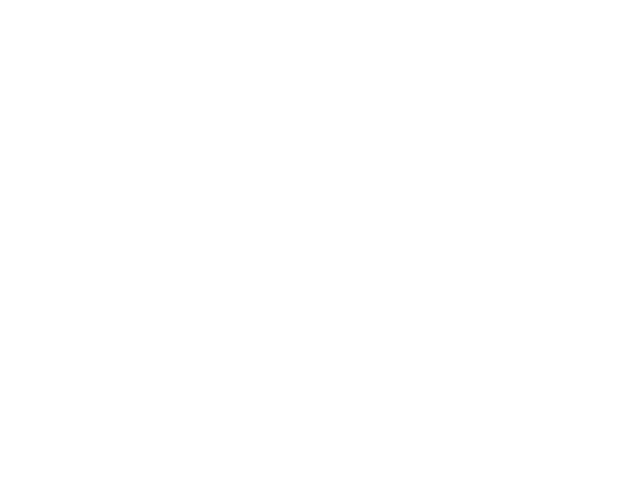

FileNotFoundError: [Errno 2] No such file or directory: '../07-analysis-waxs/HydLys_0p25_2_00015_00201_00201.dat'

In [32]:
fig = plt.figure()

samplename = 'HydLys_0p25_2_00015'#'LaB6_01_00001'#s12p1_23GlyWat_170_3_00001 #LaB6_01_00001/p300/LaB6_01_00001_00001
air_bckr=high_E_XRD()
#air_bckr.scan = 'Tramp'
air_bckr.detector = 'p300'
air_bckr.path = f'../../../raw/{samplename}/'



#runno = 110
samples_all =samples#np.arange(1,2)
col = np.array(sns.color_palette('viridis', len(samples_all)))
#binning = 400

air_bckr.path = f'../../../raw/{samplename}/'

#coefs = np.arange(1,20,2)
col = np.array(sns.color_palette('viridis', len(samples_all)))

#for count, sample in enumerate(samples_all):
#    air_bckr.name=f'{runno}_{sample:05}'
#    air_bckr.plot_Iq(count)
#    print(f"../analysis/{air_bckr.label}_{air_bckr.detector}/{air_bckr.name}.dat")

for count, sample in enumerate(samples_all):
    #sample = samples_all[0]
    air_bckr.name=f'{samplename}_{sample:05}'
    q=air_bckr.load_raw_Iq()[0]
    intens = air_bckr.load_raw_Iq()[1]
    #print(len(intens))
    
    #intens1=intens - np.mean(intens[-50:-25])
    #intens_b = intens1/intens1[323] - w_bckr_int_avg1/w_bckr_int_avg1[323]
    
    #plt.plot(q[:-50],intens1[:-50], color = col[count], marker = 'o', markerfacecolor='none', markersize=3, ls='none', label = f'{sample}')
    #plt.plot(q,intens1-1*w_bckr_int_avg1, color = col[count], marker = 'o', markerfacecolor='none', markersize=3, ls='',label = f'{sample}')

    #plt.plot(q,intens_b, color = col[count],ls='-', label = f'{sample}')
    plt.plot(q,intens, color = col[count],ls='-', label = f'{sample}')





   # plt.plot(q,(intens-w_bckr_int_avg)/np.max(intens-w_bckr_int_avg), color = col[count], marker = 'o', markerfacecolor='none', markersize=3, ls='none', label = f'{sample}')
    
  #  plt.plot(q,intens-w_bckr_int_avg, color = col[count], ls='--', label = f'{sample}')


    
    
plt.title(f'{samplename} run')
plt.grid()
#plt.legend(ncol=6, fontsize = 'small')
plt.xlabel('q, 1/nm', fontsize = 16)
plt.ylabel('intensity', fontsize = 16)
#plt.xlim(15,32)

for i in Ih_ref:
    plt.axvline(x=i*10, c='gray', lw=1, alpha=.5, ls='--')

<IPython.core.display.Javascript object>


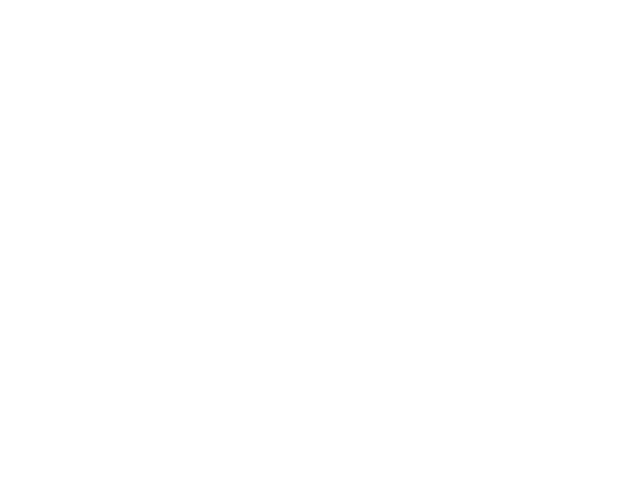

FileNotFoundError: [Errno 2] No such file or directory: '../07-analysis-waxs/empty_capillary_296_00001_00001_00001.dat'

In [40]:
fig= plt.figure()


#### background
samplename = 'empty_capillary_296_00001'
empty_cap=high_E_XRD()
#air_bckr.scan = 'Tramp'
empty_cap.detector = 'p300'
empty_cap.path = f'../../../raw/{samplename}/'
#air_bckr.integrator = '../../calibrators/V4_LaB6.poni'#Pilatus_AgBh_day2.poni' #V4_LaB6.poni'
empty_cap.integrator = '../../../processed/calibrators/LaB6_calibration.poni'
empty_cap.absorber = ''

bckr_int = []
for sample in range(1,3):
    empty_cap.name=f'{samplename}_{sample:05}'
    q=empty_cap.load_raw_Iq()[0]
    bckr_int.append(empty_cap.load_raw_Iq()[1])
    intens = empty_cap.load_raw_Iq()[1]
    #print(len(intens))
    
w_bckr_q = q
w_bckr_int_avg = np.mean(bckr_int,0)

w_bckr_int_avg1 = w_bckr_int_avg-np.mean(w_bckr_int_avg[-50:-25])

#plt.plot(w_bckr_q, w_bckr_int_avg1/np.max(w_bckr_int_avg1), color = 'black', marker = 'o', ls = 'none')
print(len(w_bckr_q))



samplename = 'HydLys_0p25_2_00015'#'LaB6_01_00001'#s12p1_23GlyWat_170_3_00001 #LaB6_01_00001/p300/LaB6_01_00001_00001
air_bckr=high_E_XRD()
#air_bckr.scan = 'Tramp'
air_bckr.detector = 'p300'
air_bckr.path = f'../../../raw/{samplename}/'
#air_bckr.integrator = '../../calibrators/V4_LaB6.poni'#Pilatus_AgBh_day2.poni' #V4_LaB6.poni'
air_bckr.integrator = '../../../processed/calibrators/LaB6_calibration.poni'
air_bckr.absorber = ''


#runno = 110
samples_all =samples#np.arange(1,2)
col = np.array(sns.color_palette('viridis', len(samples_all)))
#binning = 400

air_bckr.path = f'../../../raw/{samplename}/'

#coefs = np.arange(1,20,2)
col = np.array(sns.color_palette('viridis', len(samples_all)))

#for count, sample in enumerate(samples_all):
#    air_bckr.name=f'{runno}_{sample:05}'
#    air_bckr.plot_Iq(count)
#    print(f"../analysis/{air_bckr.label}_{air_bckr.detector}/{air_bckr.name}.dat")

for count, sample in enumerate(samples_all):
    #sample = samples_all[0]
    air_bckr.name=f'{samplename}_{sample:05}'
    q=air_bckr.load_raw_Iq()[0]
    intens = air_bckr.load_raw_Iq()[1]
    #print(len(intens))
    
    intens1=intens - np.mean(intens[-50:-25])
    intens_b = intens1/intens1[323] - w_bckr_int_avg1/w_bckr_int_avg1[323]
    
    #plt.plot(q[:-50],intens1[:-50], color = col[count], marker = 'o', markerfacecolor='none', markersize=3, ls='none', label = f'{sample}')
    plt.plot(q,intens1-1*w_bckr_int_avg1, color = col[count], marker = 'o', markerfacecolor='none', markersize=3, ls='',label = f'{sample}')

    #plt.plot(q,intens_b, color = col[count],ls='-', label = f'{sample}')



   # plt.plot(q,(intens-w_bckr_int_avg)/np.max(intens-w_bckr_int_avg), color = col[count], marker = 'o', markerfacecolor='none', markersize=3, ls='none', label = f'{sample}')
    
  #  plt.plot(q,intens-w_bckr_int_avg, color = col[count], ls='--', label = f'{sample}')


    
    
plt.title(f'{samplename} run')
plt.grid()
#plt.legend(ncol=6, fontsize = 'small')
plt.xlabel('q, 1/nm', fontsize = 16)
plt.ylabel('intensity', fontsize = 16)
#plt.xlim(15,32)

for i in Ih_ref:
    plt.axvline(x=i*10, c='gray', lw=1, alpha=.5, ls='--')

########### avarage bckgr #######
#intens_avg = []
#for sample in samples_all:
#    air_bckr.name=f'{runno}_{sample:05}'
#    intens_avg.append(air_bckr.load_raw_Iq(binning)[1])
#    q=air_bckr.load_raw_Iq(binning)[0]
    
#plt.plot(q, np.mean(intens_avg,0), lw=4)
#print(np.shape(intens_avg))

#  Ice references

In [33]:
Ih_ref = np.array([1.61297476, 1.71327851, 1.8264895 , 2.35318655, 2.79464445,
       3.03451657, 3.22634856, 3.27789344, 3.33837302, 3.6533046 ])

IX_ref = np.array([2.098, 3.11])
IV_ref = np.array([3.02])
Cu_ref = np.array([2.99, 3.47, 4.91, 5.75, 6])

In [101]:
np.where(q==32.70148)

(array([323, 723]),)

In [ ]:
#LaB6_ref = np.array([1.508 ])

In [73]:
!ls ../analysis/

align_01_00023.dat
raw_p300
s12p1_23GlyWat_170_2_00002_00001_00001.dat
s12p1_23GlyWat_170_2_00002_00002_00002.dat
s12p1_23GlyWat_170_2_00002_00003_00003.dat
s12p1_23GlyWat_170_2_00002_00004_00004.dat
s12p1_23GlyWat_170_2_00002_00005_00005.dat
s12p1_23GlyWat_170_2_00002_00006_00006.dat
s12p1_23GlyWat_170_2_00002_00007_00007.dat
s12p1_23GlyWat_170_2_00002_00008_00008.dat
s12p1_23GlyWat_170_2_00002_00009_00009.dat
s12p1_23GlyWat_170_2_00002_00010_00010.dat
s8p2_Lys_23GlyWat_170_3_00001.dat
s8p2_Lys_23GlyWat_170_3_00002_2.dat
s8p2_Lys_23GlyWat_170_3_00002.dat
s8p2_Lys_23GlyWat_170_3_00003_3.dat
s8p2_Lys_23GlyWat_170_3_00003.dat
